<div class="alert alert-info">
**Ejercicio:** Define una función `pendulo_analitico` que calcule en función del tiempo la posición del péndulo
</div>
<div class="alert alert-info">
**Ejercicio:** Grafica la solución analítica, con condiciones $\theta_i = 0.2$ y $\omega_i = 0$.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# El código siguiente recarga (reloads) las rutinas externas cada vez que el código cambia (es útil para "debuggear" código externo)

%load_ext autoreload
%autoreload 2

In [3]:
masa = 1.0 # En kilogramos
longitud = 1.0 # En metros
g = 9.8 # m/s^2

Omega = np.sqrt(g/longitud)
periodo = 2*np.pi/Omega

In [4]:
def energia_pendulo(theta, omega, m = masa, g = g, l = longitud):
    return 0.5*m*l**2 * (omega**2 + (g/l)*theta**2)

In [5]:
def pendulo_analitico(t, theta, w, Omega):
    return theta*np.cos(Omega*t) + w*np.sin(Omega*t)/Omega
    
    

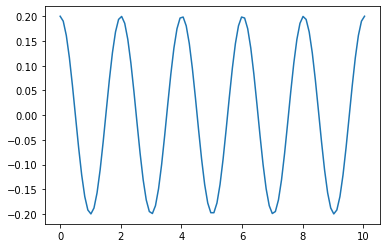

In [6]:
tau = 5 * periodo

N = 100

dt = tau/(float)(N-1)

tiempo = np.linspace(0,tau, num = N)

plt.plot(tiempo, pendulo_analitico(tiempo, .2, 0, Omega))

In [7]:
def euler(y, t, dt, derivadas):
    y_next = y + derivadas(y, t)*dt
    return y_next

In [8]:
class Pendulo:
    
    def __init__(self, masa, longitud, gravedad):
        self.masa = masa
        self.longitud = longitud
        self.gravedad = gravedad
        
        self.Omega = np.sqrt(g/longitud)
        self.period = 2*np.pi/Omega

        
    def theta(self):
        return self.trajectory[:,0]
    
    def omega(self):
        return self.trajectory[:,1]
    
    def plot(self):
        fig, ax = plt.subplots(3,1, figsize=(10,8), sharex = True)

        ax[0].plot(self.tau, self.theta(), label="theta", color="blue")
        ax[1].plot(self.tau, self.omega(), label="omega", color="green")
        ax[2].plot(self.tau, self.energy(),  marker='o', linestyle='None', color='red', label="Energia")

        ax[0].set_ylabel("Theta (rads)")
        ax[0].set_xlabel("tiempo (s)")

        ax[1].set_ylabel("Omega (rads/s)")
        ax[1].set_xlabel("tiempo (s)")

        ax[2].set_ylabel("Energia (J)")
        ax[2].set_xlabel("tiempo (s)")
        
    def initial_conditions(self, theta_i, omega_i):
        self.theta_i = theta_i
        self.omega_i = omega_i
        
    def dynamics(self, state, t):
        g0 = state[1]
        g1 = -self.gravedad/self.longitud*state[0]
        return np.array([g0, g1])
        
    def energy(self):
        return 0.5*self.masa*self.longitud**2 * (self.omega()**2 + (self.gravedad/self.longitud)*self.theta()**2)
        
    def integrate(self, num_steps, t_i, t_f, method):
        
        self.tau, self.dt = np.linspace(t_i, t_f, num=num_steps, retstep=True)
        self.trajectory = np.zeros([num_steps, 2])
        self.trajectory[0,0] = self.theta_i
        self.trajectory[0,1] = self.omega_i
        
        for j in range(N-1):
            self.trajectory[j+1] = method(self.trajectory[j], self.tau[j], self.dt, self.dynamics)        

In [9]:
p = Pendulo(masa = 1.0, longitud = 1.0, gravedad = 9.8)
p.initial_conditions(theta_i=0.2, omega_i=0.0)

In [10]:
N = 100
tiempo_inicial = 0.0
tiempo_final = 5*p.period

In [11]:
p.integrate(N, tiempo_inicial, tiempo_final, euler)

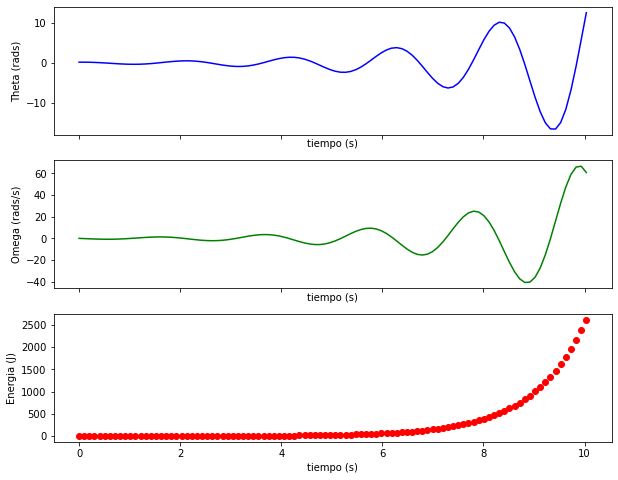

In [12]:
p.plot()

## Métodos de Runge-Kutta

In [13]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [14]:
p2 = Pendulo(masa = 1.0, longitud = 1.0, gravedad = 9.8)
p2.initial_conditions(theta_i=0.2, omega_i=0.0)

In [15]:
N = 100
tiempo_inicial = 0.0
tiempo_final = 5*p2.period

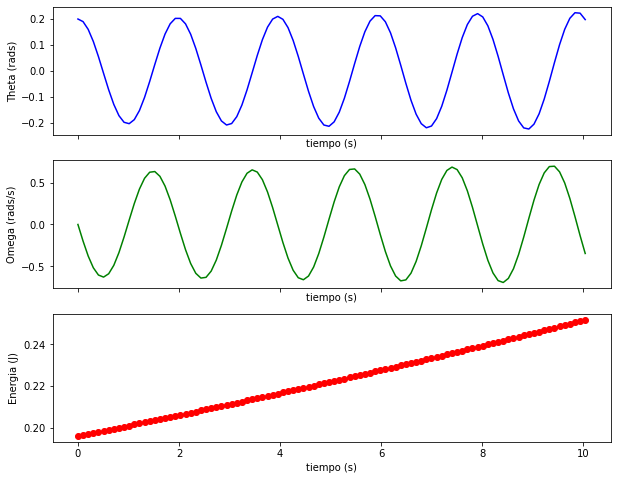

In [16]:
p2.integrate(N, tiempo_inicial, tiempo_final, RK2)
p2.plot()

<div class="alert alert-info">
**Ejercicio**: Crea una imagen donde se muestre la $\theta$ calculada con el método de Euler, RK2 y analítica. ¿Qué observas?
</div>

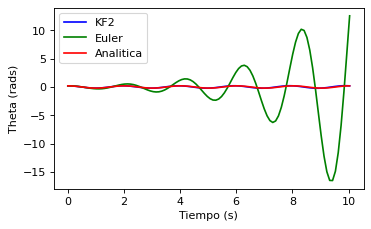

In [17]:
plt.figure(figsize = (5,3), dpi = 80)
plt.subplot(1,1,1)

plt.plot(p2.tau, p2.theta(), label ="KF2", color = "blue")
plt.plot(p.tau, p.theta(), label ="Euler", color = "green")
plt.plot(tiempo, pendulo_analitico(tiempo, .2, 0, Omega), label ="Analitica", color = "red") ##Analítico

plt.ylabel("Theta (rads)")
plt.xlabel("Tiempo (s)")
plt.legend(loc ="best")


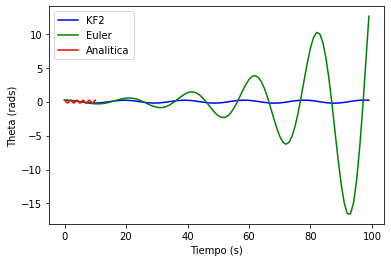

In [18]:
plt.plot(p2.trajectory[:,0], label ="KF2", color = "blue")
plt.plot(p.trajectory[:,0], label ="Euler", color = "green")
plt.plot(p.tau, pendulo_analitico(p.tau, .2, 0, Omega), label ="Analitica", color = "red") ##Analítico

plt.ylabel("Theta (rads)")
plt.xlabel("Tiempo (s)")
plt.legend(loc ="best")
